# Classification des phases montantes/descendantes d'une fonction sinus

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

from scipy import stats

from sklearn.cluster import KMeans

# 1 - Génération du signal

In [2]:
Fs = 1000 
f = 5 
sample = 800 
x_1 = np.arange(sample) 
noise = 0.0008*np.asarray(random.sample(range(0,1000),sample))

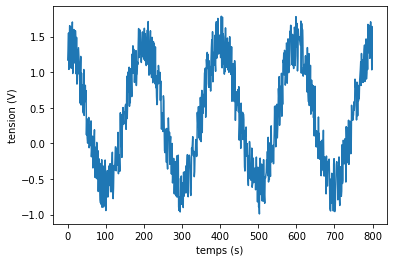

In [3]:
y_1 = np.cos(2 * np.pi * f * x_1 / Fs)+noise #Pour signal bruité
#y_1 = np.cos(2 * np.pi * f * x_1 / Fs)       #Pour signal non bruité
plt.plot(x_1, y_1) 
plt.xlabel('temps (s)') 
plt.ylabel('tension (V)') 
plt.show()

In [4]:
label0 = np.reshape((np.array([[0]*100,[1]*100]*4)),-1)

Text(0.5, 1.0, 'Sinus, classe 0 (descendante), en violet, classe 1 (ascendante), en jaune')

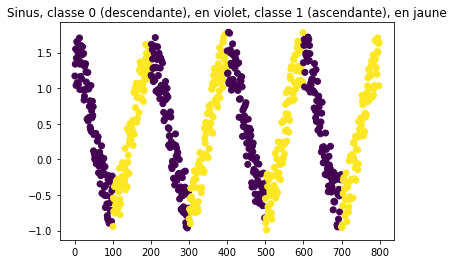

In [5]:
plt.scatter(x_1,y_1, c= label0)
plt.title('Sinus, classe 0 (descendante), en violet, classe 1 (ascendante), en jaune')

In [6]:
##Fenetres Glissantes

In [7]:
k = 20
tmp = np.array([y_1]).T
X = []
label = []
for ind in range (0, 800-k):
    X.append(tmp[ind:ind+k])
    label.append(label0[ind])

In [8]:
len(X)

780

# 2 - Supervisé

## Formalisation des données

In [9]:
X_f = np.array(X).reshape(-1,k)
label_f = np.array(label)

## Données de train et de test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_f, label_f, test_size = .15)

In [11]:
mlp = MLPClassifier(random_state=1,hidden_layer_sizes = (10,10), max_iter=3000)

In [12]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=3000, random_state=1)

In [13]:
pred = mlp.predict(X_test)

In [14]:
confusion_matrix(y_test,pred)

array([[57,  5],
       [ 7, 48]], dtype=int64)

In [15]:
mlp.score(X_test,y_test)

0.8974358974358975

# 3 - Non supervisé

In [16]:
dfX = pd.DataFrame(data = X_f)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(dfX, label_f, test_size = .15)

In [18]:
dataPente = []
for ind in range(len(dfX.index)):
    pts = dfX.iloc[ind]
    slope,_,_,_,_ = stats.linregress(range(20), pts)
    dataPente.append(slope)
dataPente = np.array(dataPente)

Text(0.5, 1.0, 'Résultats de la prédiction')

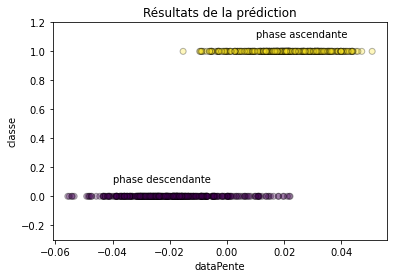

In [19]:
plt.figure()
plt.scatter(dataPente,label, c = label, marker='o', edgecolors='k', alpha = .3)
plt.ylim(-.3,1.2)
plt.xlabel('dataPente')
plt.ylabel('classe')
plt.annotate(xy=[-0.04,0.1],text = 'phase descendante')
plt.annotate(xy=[0.01,1.1],text = 'phase ascendante')
plt.title('Résultats de la prédiction')

In [20]:
ind_p_des = np.where(np.array(label)==0)[0]
ind_p_asc = np.where(np.array(label)==1)[0]

### KMeans

In [21]:
Km = KMeans(n_clusters=2)

Km.fit(dataPente[X_train.index].reshape(-1,1))

KMeans(n_clusters=2)

In [22]:
y_pred = Km.predict(dataPente[X_test.index].reshape(-1,1))

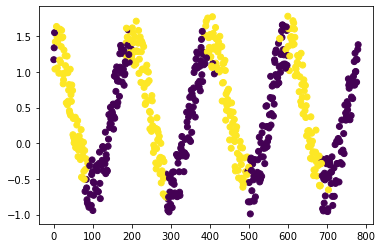

In [23]:
plt.scatter(x_1[X_train.index],y_1[X_train.index], c = Km.labels_ )

In [24]:
conf_mat = confusion_matrix(y_pred, y_test )
score = (conf_mat[0,0]+conf_mat[1,1])/(conf_mat.sum())

In [25]:
print("Matrice de confusion : \n",conf_mat)
print("\n Score : ",round(score,3))

Matrice de confusion : 
 [[ 7 57]
 [50  3]]

 Score :  0.085


Text(0.5, 1.0, 'Résultats de la prédiction, la couleur dépend de la classe prédite')

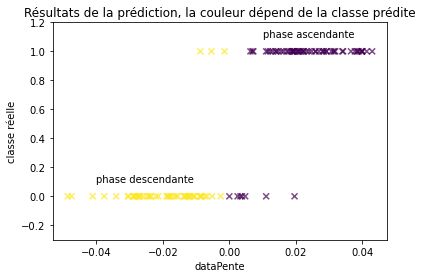

In [26]:
plt.figure()
plt.scatter(dataPente[X_test.index],y_test, c = y_pred, marker='x', alpha = .7)
plt.ylim(-.3,1.2)
plt.xlabel('dataPente')
plt.ylabel('classe réelle')
plt.annotate(xy=[-0.04,0.1],text = 'phase descendante')
plt.annotate(xy=[0.01,1.1],text = 'phase ascendante')
plt.title('Résultats de la prédiction, la couleur dépend de la classe prédite')

Text(0.5, 1.0, 'Résultats de la prédiction, la couleur dépend de la classe prédite')

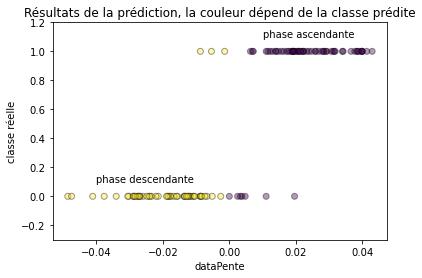

In [27]:
plt.figure()
plt.scatter(dataPente[X_test.index],y_test, c = y_pred, marker='o', edgecolors='k', alpha = .4)
plt.ylim(-.3,1.2)
plt.xlabel('dataPente')
plt.ylabel('classe réelle')
plt.annotate(xy=[-0.04,0.1],text = 'phase descendante')
plt.annotate(xy=[0.01,1.1],text = 'phase ascendante')
plt.title('Résultats de la prédiction, la couleur dépend de la classe prédite')

### Tests

In [28]:
from utils import slope_estimator
from sklearn.cluster import KMeans

In [29]:
y_predicted = slope_estimator(tailleWin=10).fit(y_1)

In [30]:
y_1.shape

(800,)

In [37]:
from sklearn.pipeline import Pipeline


pip = Pipeline([
    ("estimator", slope_estimator()),
    ("km", KMeans(n_clusters=2))
])

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' '<utils.slope_estimator object at 0x00000152BFFCD040>' (type <class 'utils.slope_estimator'>) doesn't

In [ ]:
test = pipe.fit(y_1)

In [ ]:
test